In [1]:
import numpy as np
inputs=[-2,3,4,-5,3,-5.4]
relu_output=np.maximum(0,inputs)

print(relu_output)

[0. 3. 4. 0. 3. 0.]


### Relu activation function

In [2]:
#Relu activation function

class activation_Relu: 
    #forward Pass
    def forward(self,inputs):
        #calculate output values from inputs
        self.output =np.maximum(0,inputs)


### softmax activation function

### array summation and broadcasting
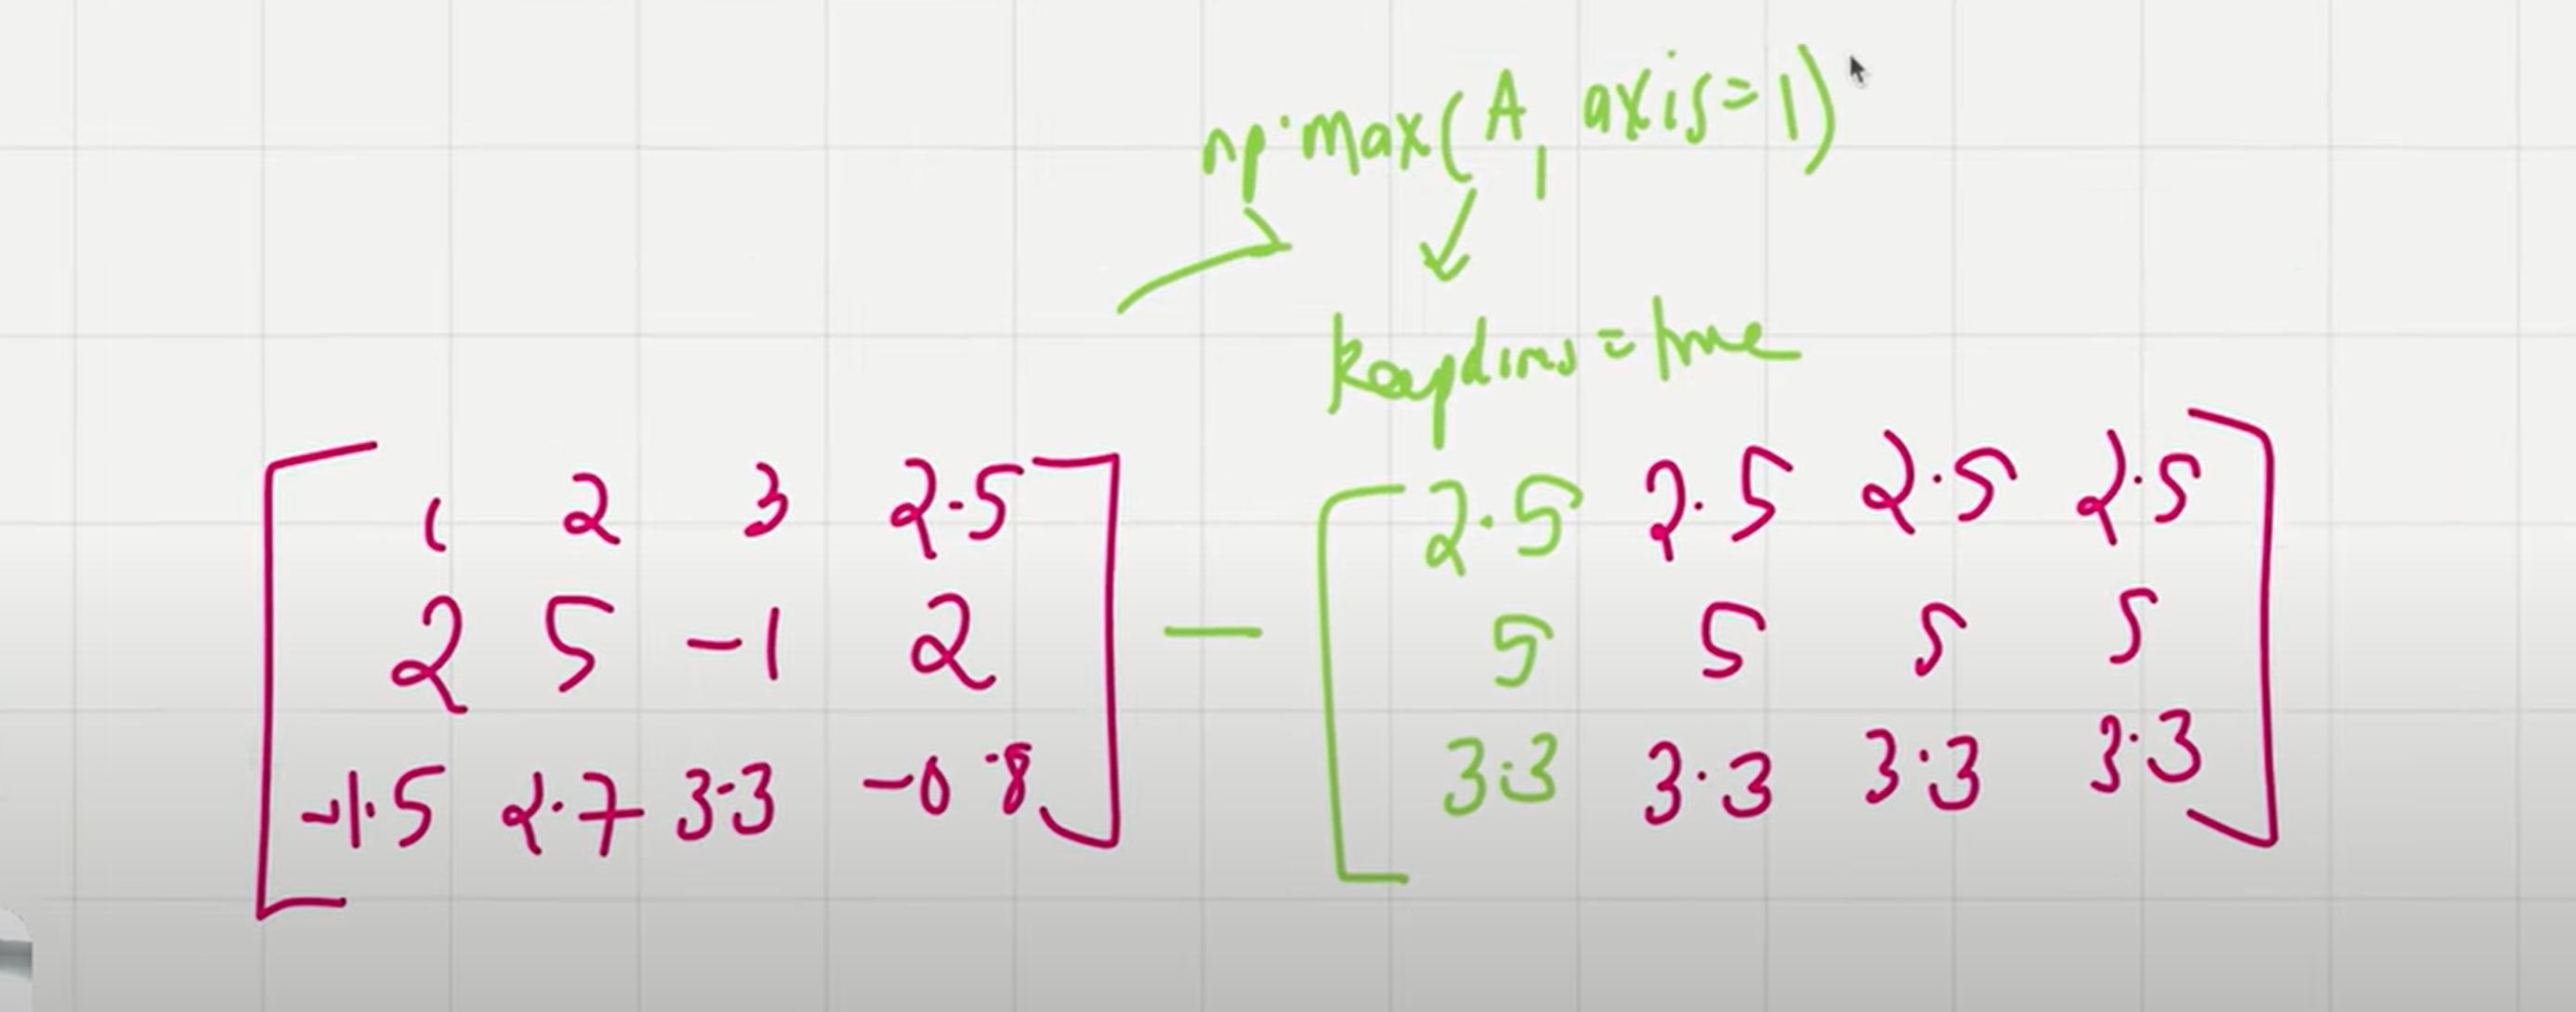

In [3]:
inputs=[[1,2,3,2.5],
        [2.0,5.0,-1.0,2.0],
        [-1.5,2.7,3.3,0.8]]

        #get unnormalized probabilities
        


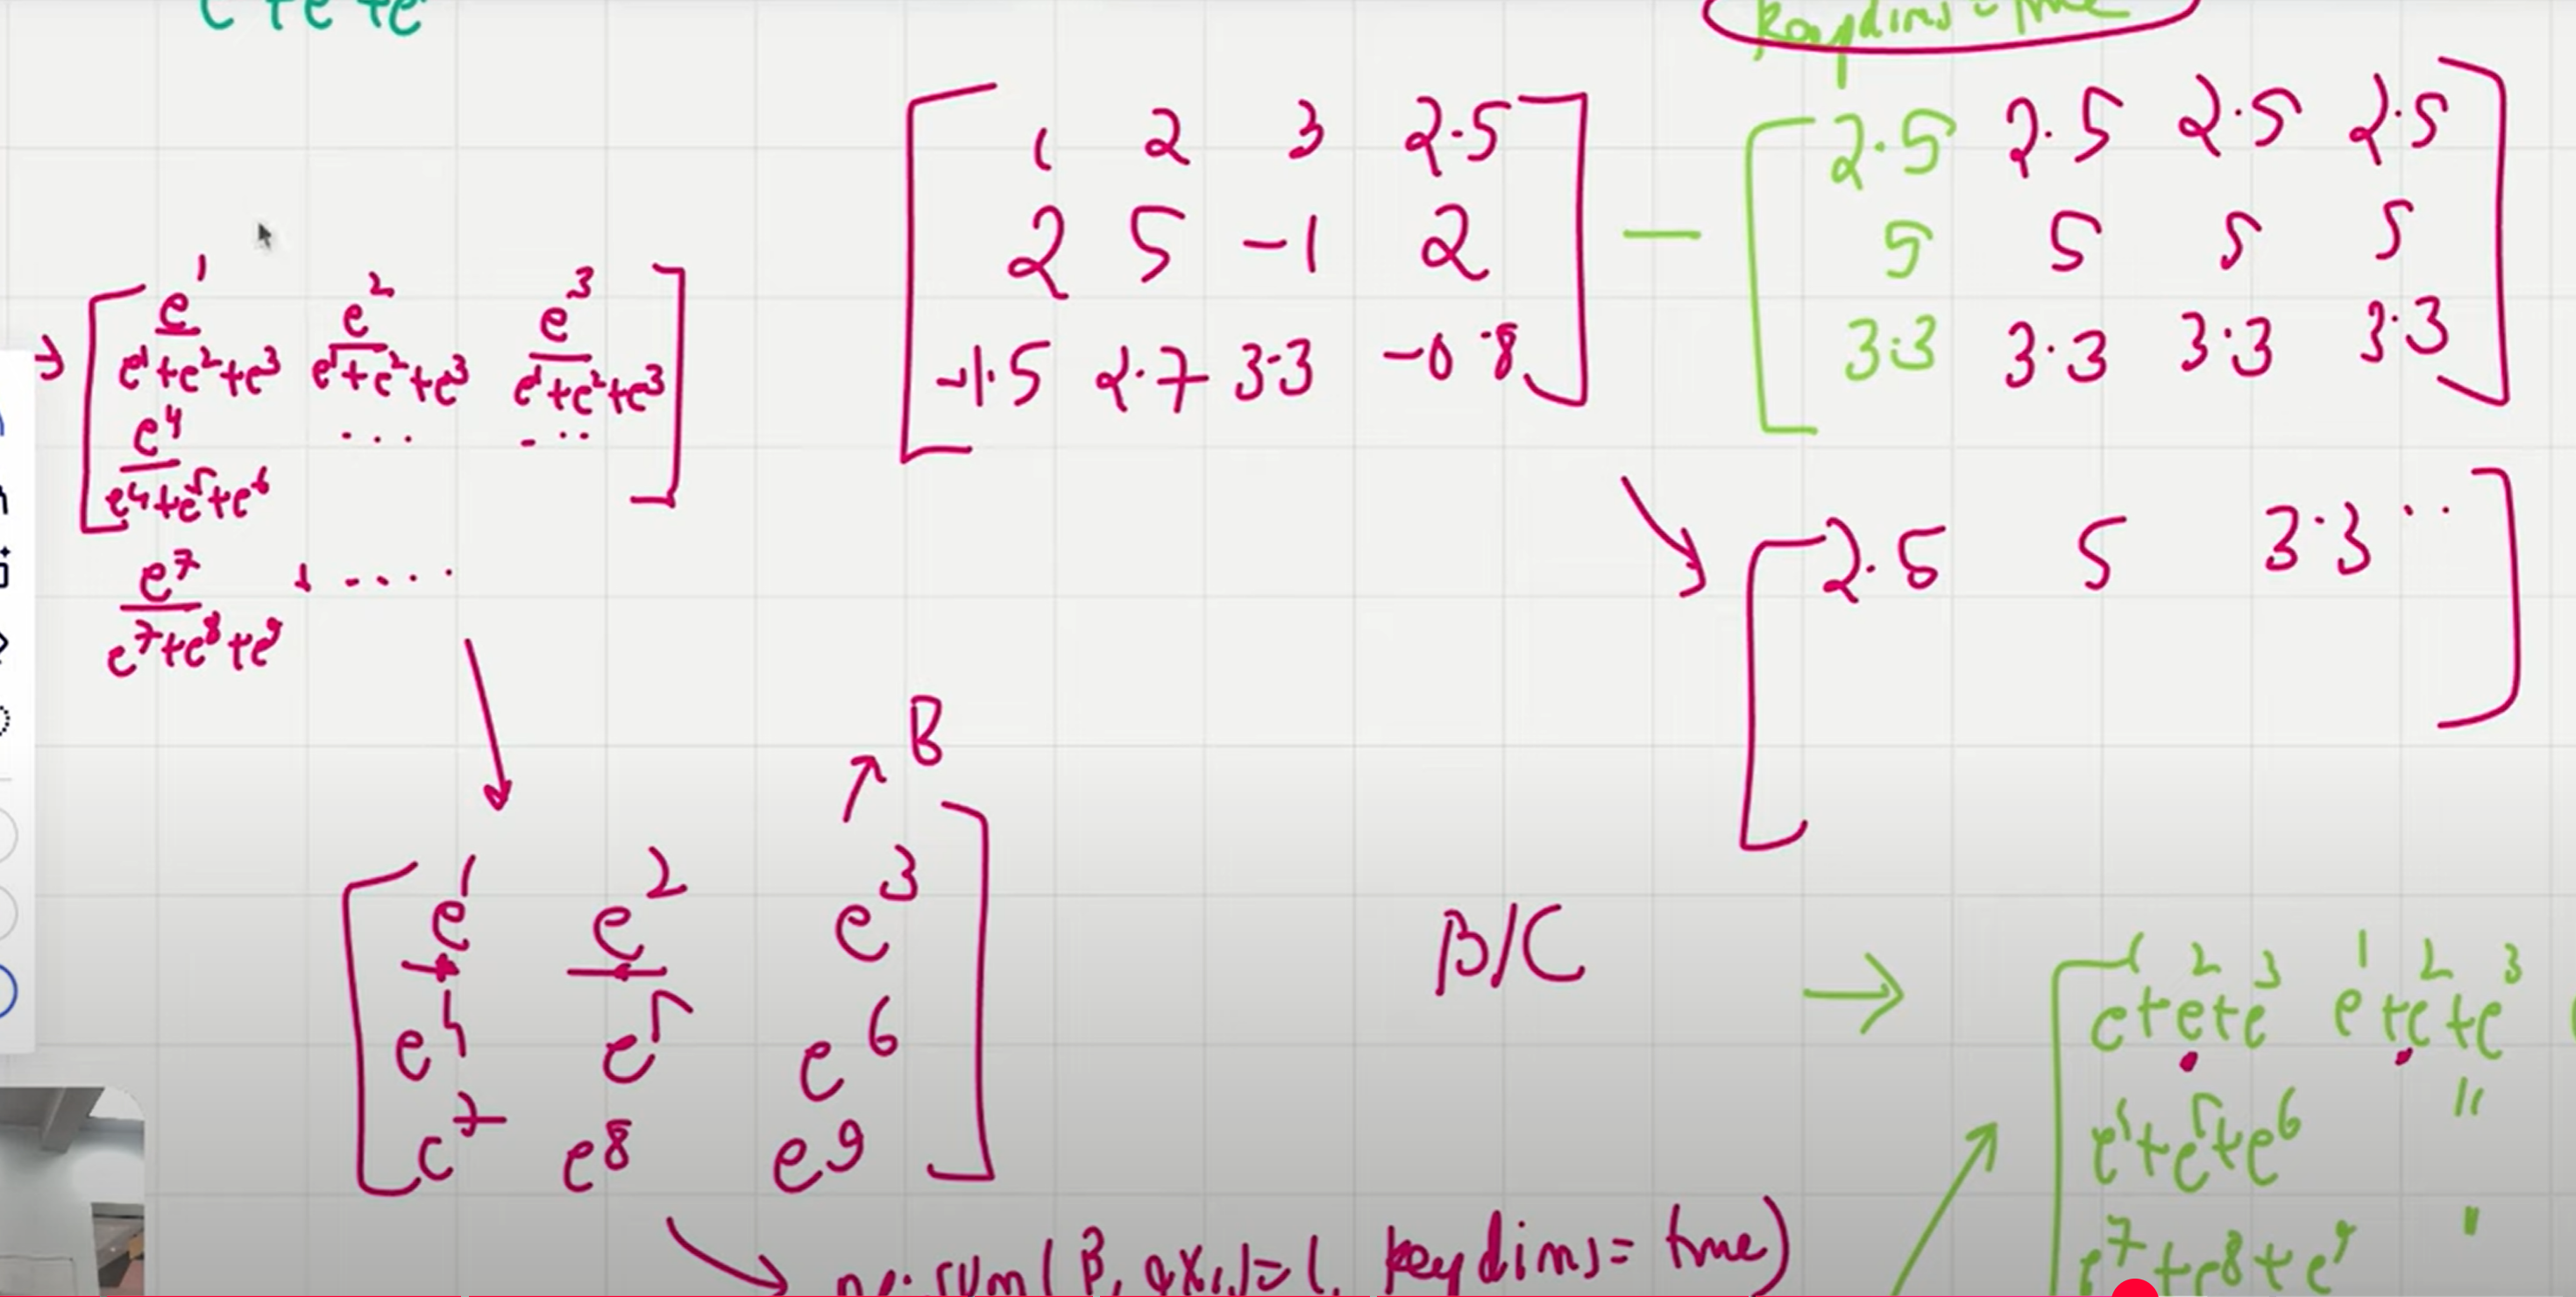

In [4]:
#Get unnormalized probabilities--- using array broadcasting and summation
exp_values=np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
exp_values

array([[0.13533528, 0.36787944, 1.        , 0.60653066],
       [0.04978707, 1.        , 0.00247875, 0.04978707],
       [0.00822975, 0.54881164, 1.        , 0.082085  ]])

In [5]:
probability=exp_values/np.sum(exp_values, axis=1,keepdims=True)
probability

array([[0.06414769, 0.17437149, 0.47399085, 0.28748998],
       [0.04517666, 0.90739747, 0.00224921, 0.04517666],
       [0.00502081, 0.3348196 , 0.61008108, 0.0500785 ]])

In [6]:
np.sum(probability,axis=1)

array([1., 1., 1.])

### softmax activation function class

In [7]:
class Activation_Softmax:
    #FORWARD PASS
    def forward(self, inputs):
        exp_values=np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
        probability=exp_values/np.sum(exp_values, axis=1,keepdims=True)
        self.output=probability

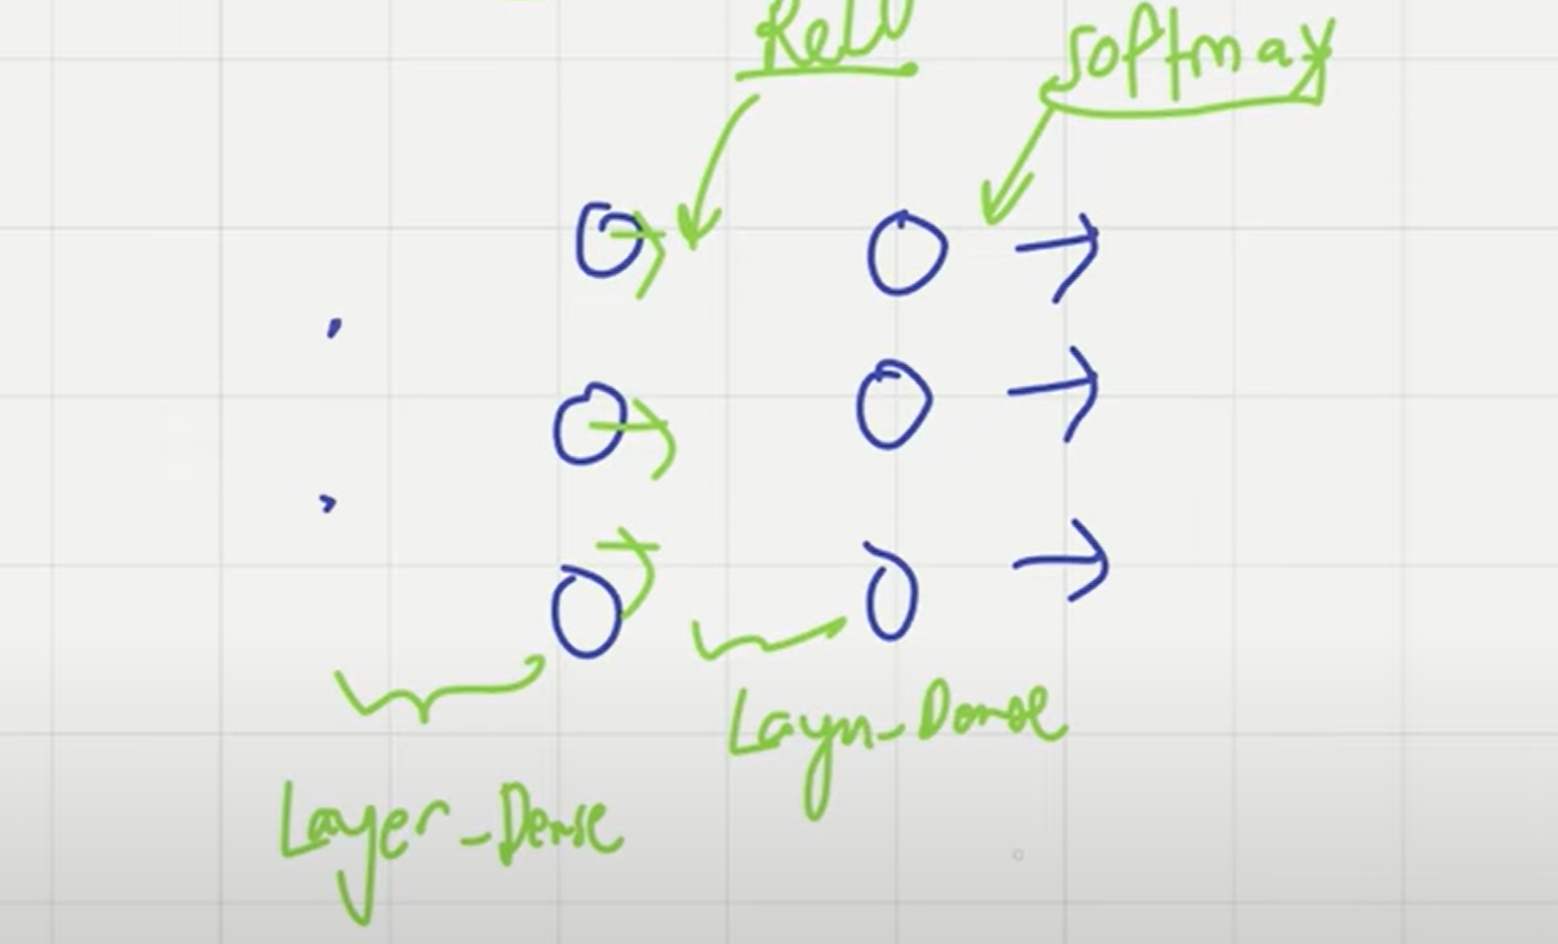

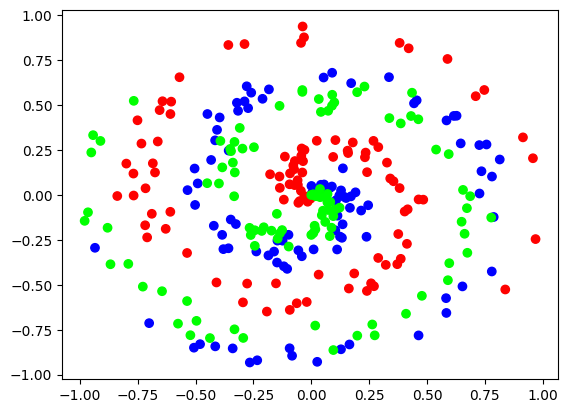

In [8]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()

X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg');

In [9]:
class Layer_Dense:
    def __init__(self, inputs,neurons):
        self.weights= 0.01*np.random.randn(inputs,neurons)
        self.biases=np.zeros((1,neurons))
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases


In [10]:
#create dense layer with 2 inputs and 3 outputs as you can see in the image above
dense1= Layer_Dense(2,3)
#create relu activation (to be used with dense layer)
activation1=activation_Relu()
#Create second dense layer with 3 inputs features (as we take output 
# of previous laye here) and # output values 

dense2= Layer_Dense(3,3)
#Create a softmax activation (to be used with densse layer):
activation2=Activation_Softmax()


# make a forward pass of out tranning data through this layer
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


In [11]:
import numpy as np

In [12]:
softmax_output = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.8, 0.1],
                            [0.1, 0.2, 0.7]])
class_targets = np.array([0, 1, 1])
print(softmax_output[[0, 1, 2], class_targets])

## it is liek --> [softmax_output[0][0], softmax_output[1][1], softmax_output[2][1]] | []--> class , [] ---> targets


[0.7 0.8 0.2]


### This code is when your class target numbers

In [13]:
import numpy as np

# Assuming softmax_output is a 2D array where each row represents class probabilities for a sample
# and class_targets is an array of true class indices

# Example data (replace with your actual data)
softmax_output = np.array([[0.7, 0.1, 0.2],  # Class 0 has highest probability
                          [0.1, 0.5, 0.4],  # Class 1 has highest probability
                          [0.3, 0.4, 0.3]]) # Class 1 has highest probability
class_targets = np.array([0, 1, 1])  # True classes

# Calculate negative log likelihood
#class_targets--> [0,1,1]
#range(len(softmax_output))--> [0,1,2]  --(len(softmax_output)) >> 3(no of rows)
#taking the negative log of each predicted probality (indiviusiual loss)



neg_log = -np.log(softmax_output[range(len(softmax_output)), class_targets])


average_neg_log = np.mean(neg_log)

print("Negative log values:", neg_log)
print("Average negative log likelihood (loss):", average_neg_log)

Negative log values: [0.35667494 0.69314718 0.91629073]
Average negative log likelihood (loss): 0.6553709521242777


## Most of the probelm that we will delt , will include one hot encoding

In [14]:
class_target=np.array([[1,0,0],[0,1,0],[0,0,1]])
pridiction=np.array([[0.7,0.2,0.1],[0.1,0.8,0.1],[0.2,0.2,0.6]])

softmax_output=class_target*pridiction
print(softmax_output)
print("\n")
loss=np.sum(softmax_output,axis=1)
print(loss)
actual_loss=-np.log(loss)
average_loss=np.mean(actual_loss)
print(average_loss)


[[0.7 0.  0. ]
 [0.  0.8 0. ]
 [0.  0.  0.6]]


[0.7 0.8 0.6]
0.3635480396729776


### Forward Pass with losss and activation function

In [15]:
from nnfs.datasets import spiral_data

In [16]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation = activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2=Layer_Dense(3,3)
# Create Softmax activation (to be used with Dense layer):
activation2 = activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()




# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])
# Perform a forward pass through activation function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
 accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)


NameError: name 'activation_ReLU' is not defined